# Importing Dependencies

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading Image

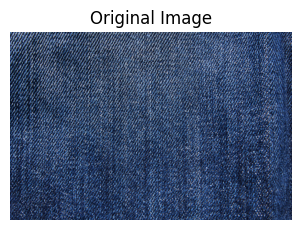

In [ ]:
# Define the path to the image file
image_path = "/content/drive/MyDrive/GSM/test-data/denim-0001.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
  plt.figure(figsize=(8, 4))

  # Original Image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

  plt.show()
else:
  print(f"Error: Unable to load the image from {image_path}")

In [ ]:
image.shape

(1280, 1920, 3)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

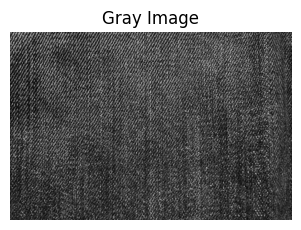

In [ ]:
# Convert the cropped image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 4))

# Gray Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Image')
plt.axis('off')

plt.show()

# Assumed Procedure

- load image
- check color format
- convert to grayscale if necessary
- crop to 1:1 and obtain best portion (for easier calculations)
- find threads (contrast stretching or fourier transforms)
- extract threads (direct contour extraction or watershed algorithm)
- calculate gsm

# Pre processing

Image Dimensions - Height: 1280, Width: 1920
Minimum Dimension: 1280


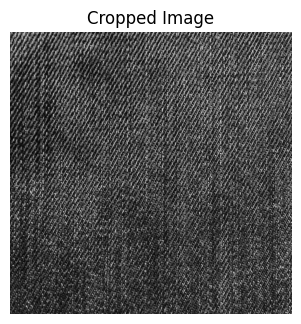

In [ ]:
# Get the dimensions of the image
height, width = gray.shape

print(f"Image Dimensions - Height: {height}, Width: {width}")

# Get the minimum of width and height
min_dimension = min(height, width)

print(f"Minimum Dimension: {min_dimension}")

# Crop the image to min_dimension x min_dimension
gray = gray[:min_dimension, :min_dimension]

plt.figure(figsize=(8, 4))

# Cropped Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

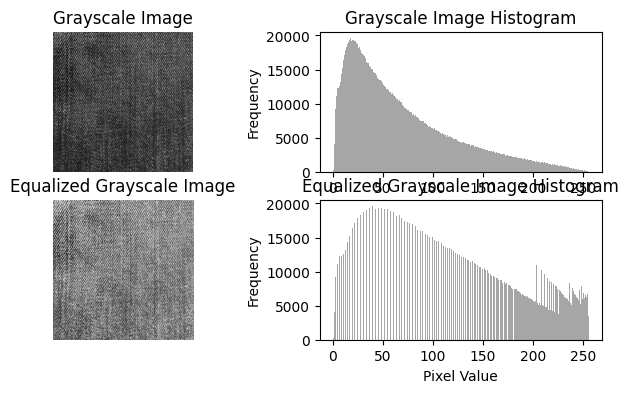

In [ ]:
# Equalize the histogram
equalized_gray_image = cv2.equalizeHist(gray)

# Display the images
plt.figure(figsize=(8, 4))

# Grayscale Image
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Calculate and plot the histogram of the grayscale image
plt.subplot(2, 2, 2)
plt.hist(gray.flatten(), bins=256, range=[0,256], color='gray', alpha=0.7)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized Grayscale Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_gray_image, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

# Calculate and plot the histogram of the equalized grayscale image
plt.subplot(2, 2, 4)
plt.hist(equalized_gray_image.flatten(), bins=256, range=[0,256], color='gray', alpha=0.7)
plt.title('Equalized Grayscale Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

Half Image Dimensions - Height: 640, Width: 640


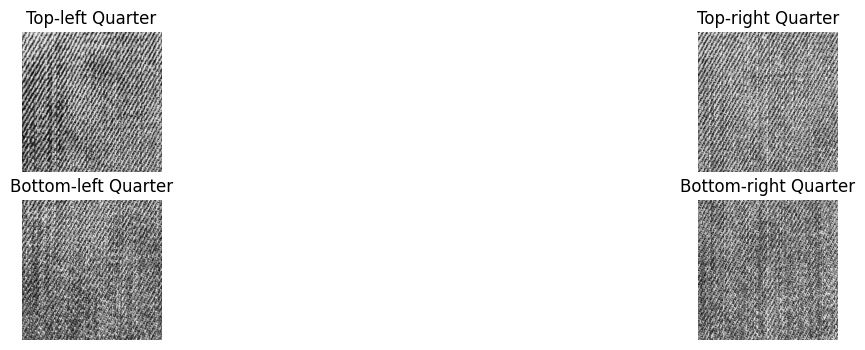

In [ ]:
# Get the dimensions of the cropped image
cropped_height, cropped_width = gray.shape

# Divide the equalized image into 4 equal parts
height_half = cropped_height // 2
width_half = cropped_width // 2

print(f"Half Image Dimensions - Height: {height_half}, Width: {width_half}")

# Top-left quarter
top_left_quarter = equalized_gray_image[:height_half, :width_half]

# Top-right quarter
top_right_quarter = equalized_gray_image[:height_half, width_half:]

# Bottom-left quarter
bottom_left_quarter = equalized_gray_image[height_half:, :width_half]

# Bottom-right quarter
bottom_right_quarter = equalized_gray_image[height_half:, width_half:]

# Display the original, grayscale, equalized, and divided images using Matplotlib
plt.figure(figsize=(16, 4))

# Divided Images
plt.subplot(2, 2, 1)
plt.imshow(top_left_quarter, cmap='gray')
plt.title('Top-left Quarter')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(top_right_quarter, cmap='gray')
plt.title('Top-right Quarter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bottom_left_quarter, cmap='gray')
plt.title('Bottom-left Quarter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bottom_right_quarter, cmap='gray')
plt.title('Bottom-right Quarter')
plt.axis('off')

plt.show()

In [ ]:
# Calculate standard deviation for each quarter
std_dev_top_left = np.std(top_left_quarter)
std_dev_top_right = np.std(top_right_quarter)
std_dev_bottom_left = np.std(bottom_left_quarter)
std_dev_bottom_right = np.std(bottom_right_quarter)

# Display the standard deviation values
print(
    f"Standard Deviation - Top-left: {std_dev_top_left}, Top-right: {std_dev_top_right}, "
    f"Bottom-left: {std_dev_bottom_left}, Bottom-right: {std_dev_bottom_right}"
)

# Determine the quarter with the lowest standard deviation
quarters_std_dev = [
    std_dev_top_left,
    std_dev_top_right,
    std_dev_bottom_left,
    std_dev_bottom_right,
]
max_std_dev_index = np.argmax(quarters_std_dev)

# Display the image with the highest contrast
evenly_distributed_image = [
    top_left_quarter,
    top_right_quarter,
    bottom_left_quarter,
    bottom_right_quarter,
][max_std_dev_index]

Standard Deviation - Top-left: 75.92902777368433, Top-right: 80.06285809314132, Bottom-left: 65.47716773805944, Bottom-right: 69.21276260511897


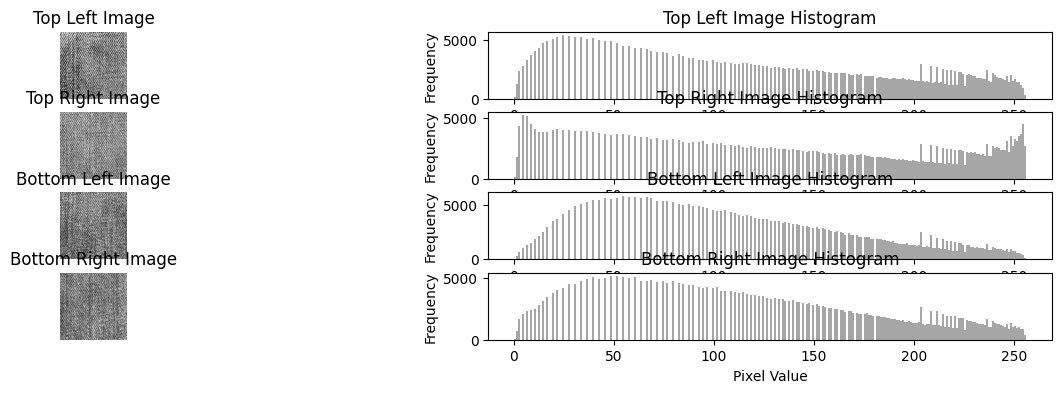

In [ ]:
# Display images using Matplotlib
plt.figure(figsize=(16, 4))

plt.subplot(4, 2, 1)
plt.imshow(top_left_quarter, cmap='gray')
plt.title('Top Left Image')
plt.axis('off')

# Calculate and plot the histogram of the evnly distributed image
plt.subplot(4, 2, 2)
plt.hist(
    top_left_quarter.flatten(), bins=256, range=[0, 256], color="gray", alpha=0.7
)
plt.title("Top Left Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(4, 2, 3)
plt.imshow(top_right_quarter, cmap='gray')
plt.title('Top Right Image')
plt.axis('off')

# Calculate and plot the histogram of the evnly distributed image
plt.subplot(4, 2, 4)
plt.hist(
    top_right_quarter.flatten(), bins=256, range=[0, 256], color="gray", alpha=0.7
)
plt.title("Top Right Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(4, 2, 5)
plt.imshow(bottom_left_quarter, cmap='gray')
plt.title('Bottom Left Image')
plt.axis('off')

# Calculate and plot the histogram of the evnly distributed image
plt.subplot(4, 2, 6)
plt.hist(
    bottom_left_quarter.flatten(), bins=256, range=[0, 256], color="gray", alpha=0.7
)
plt.title("Bottom Left Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(4, 2, 7)
plt.imshow(bottom_right_quarter, cmap='gray')
plt.title('Bottom Right Image')
plt.axis('off')

# Calculate and plot the histogram of the evnly distributed image
plt.subplot(4, 2, 8)
plt.hist(
    bottom_right_quarter.flatten(), bins=256, range=[0, 256], color="gray", alpha=0.7
)
plt.title("Bottom Right Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()

Analysis

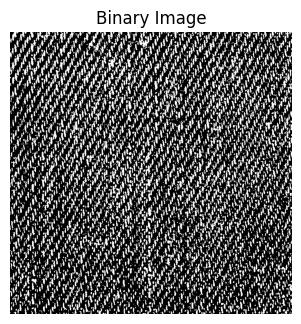

In [ ]:
# Threshold to separate yarn from background
threshold_value = 200
_, binary_image = cv2.threshold(evenly_distributed_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 4))

# Binary Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))
plt.title('Binary Image')
plt.axis('off')

plt.show()

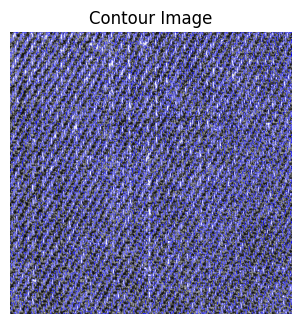

In [ ]:
# Find contours in the binary image to identify the shapes of the yarn.
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = cv2.cvtColor(evenly_distributed_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 1)

plt.figure(figsize=(8, 4))

# Contour Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Image')
plt.axis('off')

plt.show()

View Results

In [ ]:
# Initialize variables for yarn count and total contour area
yarn_count = len(contours)
total_contour_area = 0

# Calculate contour area
for contour in contours:
    contour_area = cv2.contourArea(contour)
    total_contour_area += contour_area

# Calculate yarn density (contour area normalized by image area)
image_area = evenly_distributed_image.shape[0] * evenly_distributed_image.shape[1]
yarn_density = total_contour_area / image_area

# Print the results
print(f"Yarn Count: {yarn_count}")
print(f"Total Contour Area: {total_contour_area}")
print(f"Yarn Density: {yarn_density}")

# Assumptions
median_fabric_thickness = 0.001  # Assumed fabric thickness in meters
yarn_linear_density = 400  # Yarn linear density in grams per meter
weave_strength = 2000

# Calculate GSM
estimated_gsm = yarn_density * median_fabric_thickness * yarn_linear_density * weave_strength

# Print the result
print(f"Estimated GSM: {estimated_gsm} gsm")

Yarn Count: 4982
Total Contour Area: 75144.0
Yarn Density: 0.18345703125
Estimated GSM: 146.765625 gsm


***